In [1]:
import os

os.chdir("/home/andre/SmartBinAnalysis/Deliverables")

In [2]:
import pandas as pd
import save_load as sl
import transform as t

pd.set_option('future.no_silent_downcasting', True)

PATH = "home/andre/MySmartData/"

ids = sl.load_id_containers(path = PATH)

container_dict = {id: sl.load_container_structured(id, path=PATH,  ver = "_UnCorrected_with_metrics_") for id in ids}

# t.view_metrics(container_dict, box_window=7, mv_thresh = 50, min_days = 30, use = 'spear')

FileNotFoundError: [Errno 2] No such file or directory: '/home/andre/MySmartData/ids.csv'

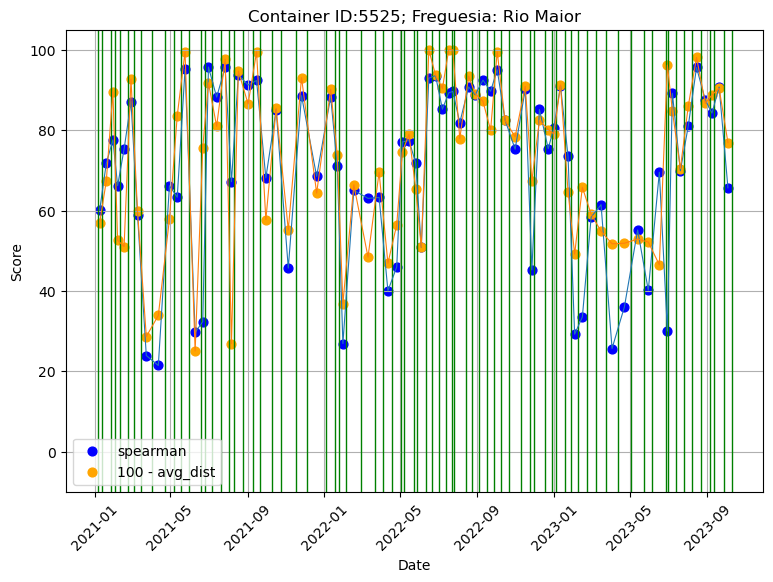

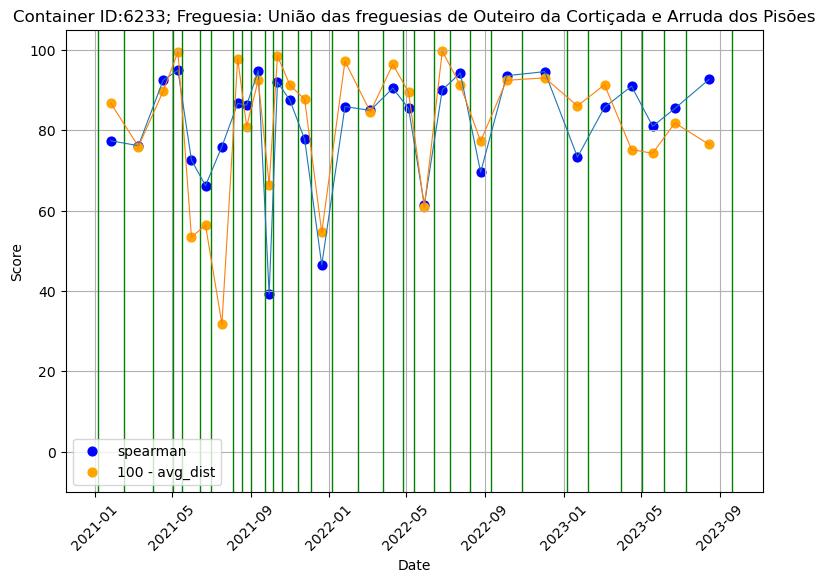

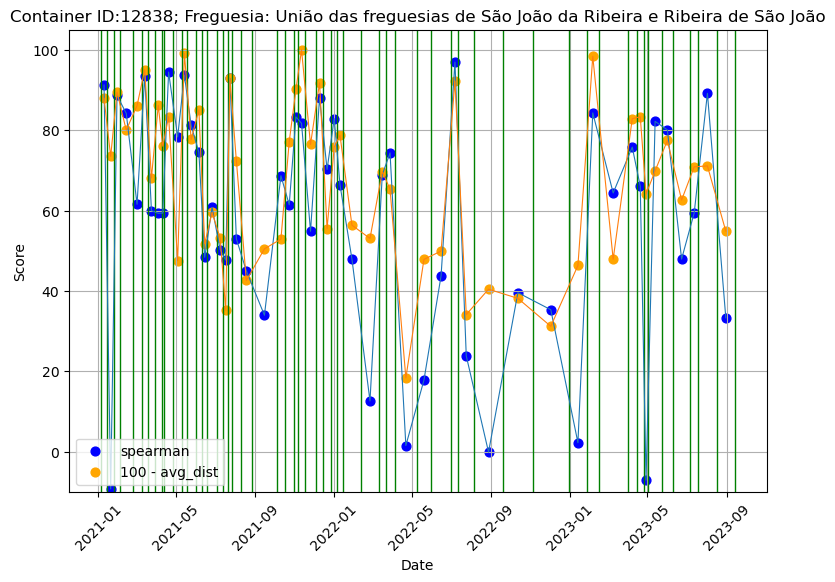

In [5]:
import random

from Container import TAG, Container

container:Container # type annotation
tags:list[TAG] = []

start_date = "01-01-2020"
end_date = "01-01-2025"

tags = [container.get_tag(window=7, mv_thresh = 70, min_days = 30, use = 'avg_dist') 
        for _, container in container_dict.items()]

warn_ids = [x[0] for x in random.sample(list(filter(lambda x: x[1] == TAG.WARN, zip(ids, tags))) , 3)]

for id in warn_ids:
    container_dict[id].plot_collection_metrics(start_date=start_date, end_date=end_date)

To set hyperparameters one has to be careful with the way to handle the noise terms. Experimentally I set the max fill level to consider a collection to 24 and oblige a bin to have at list collected 24 of trash because of teh sensor sensibility. The spearman thresh can be set quite high because when in doubt te algorithm works generally well. Notice that teh spear threshold is only used when placing collections.

For now we set the dvar to very high so that we can plot the difference of variance between the placing of collections cleanly and then adjust the parameter. You will notice that in some areas that many collections are placed.

THIS PROMPT IS SLOW AND UNNECESSARY; I AM JUST MOTIVATING THE VAR HYPERPARAMETER. PASS IF NOT INTERESTED

(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   2.,   0.,   2.,   4.,  15., 182., 141.,  61.,
         31.,  13.,   7.,   6.,   1.,   3.,   2.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([-1.05792898e-02, -1.00465998e-02, -9.51390976e-03, -8.98121973e-03,
        -8.44852970e-03, -7.91583967e-03, -7.38314964e-03, -6.85045961e-03,
        -6.31776957e-03, -5.78507954e-03, -5.25238951e-03, -4.71969948e-03,
        -4.18700945e-03, -3.65431942e-03, -3.12162939e-03, -2.58893936e-03,
        -2.05624933e-03, -1.52355930e-03, -9.90869268e-04, -4.58179237e-04,
         7.45107936e-05,  6.07200824e-04,  1.13989085e-03,  1.67258089e-03,
         2.20527092e-03,  2.73796095e-03,  3.27065098e-03,  3.80334101e-03,
         4.33603104e-03,  4.86872107e-03,  5.40141110e-03,  5.93410113e-03,
         6.46679116e-03,  6.99948119e-03,  7.53217

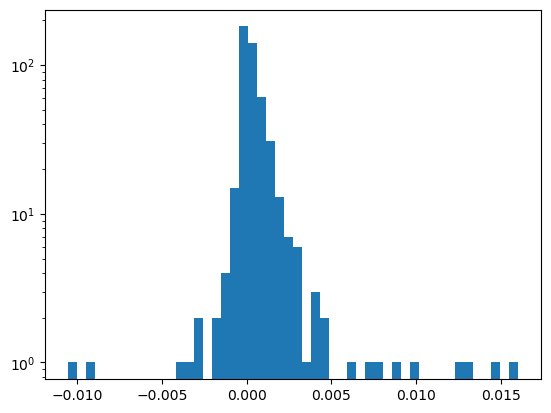

In [ ]:
import matplotlib.pyplot as plt

dvarl = []

container:Container
for id, container in container_dict.items():
    dvar, _, _ = t.fix_collections_sensor(
                                        container,
                                        box_window   = 7,
                                        mv_thresh    = 50,
                                        min_days     = 30,
                                        max_fill     = 24,
                                        dist_thresh  = 70,
                                        c_trash      = 24,
                                        var_thresh   = 200000000,
                                        spear_thresh = 60,
                                        use          = "spear")
    dvarl.append(dvar)

plt.yscale('log')
plt.hist(dvarl, bins=50)

As you can see the variance changes quite a lot when applying these algorithms. While values From 0 to 0.01 seem to follow a normal distribution, more than this is a order of magnitude grater that the changes we used to when analyzing this fro drivers; so setting this threshold to 0.01 seems to be a reasonable decision. This avoids over placing collections

(array([  2.,   0.,   4., 203., 253.,  12.,   3.,   2.,   2.,   2.]),
 array([-1.05792898e-02, -7.91583967e-03, -5.25238951e-03, -2.58893936e-03,
         7.45107936e-05,  2.73796095e-03,  5.40141110e-03,  8.06486125e-03,
         1.07283114e-02,  1.33917616e-02,  1.60552117e-02]),
 <BarContainer object of 10 artists>)

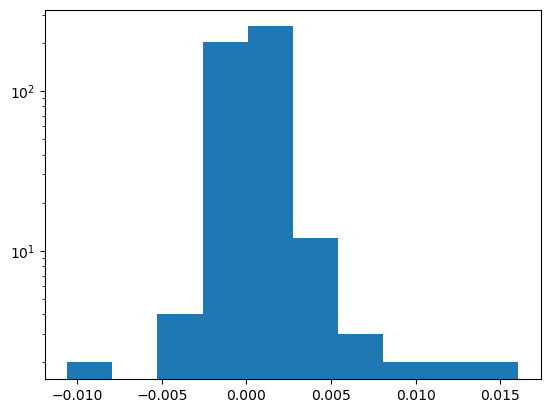

In [ ]:
import matplotlib.pyplot as plt

dvarl = []

container:Container
for id, container in container_dict.items():
    dvar, _, container_dict[id] = t.fix_collections_sensor(
                                                        container,
                                                        box_window   = 7,
                                                        mv_thresh    = 50,
                                                        min_days     = 30,
                                                        max_fill     = 24,
                                                        dist_thresh  = 70,
                                                        c_trash      = 24,
                                                        var_thresh   = 0.01,
                                                        spear_thresh = 60,
                                                        use          = "spear")
    dvarl.append(dvar)

plt.yscale('log')
plt.hist(dvarl)

Notice that we managed to really improve our metrics, spearman and avg-dist wise; killing a the negative spearman values. Also, we were able to recuperate 10% of the bins of the 30% that we deemed bad at the beginning

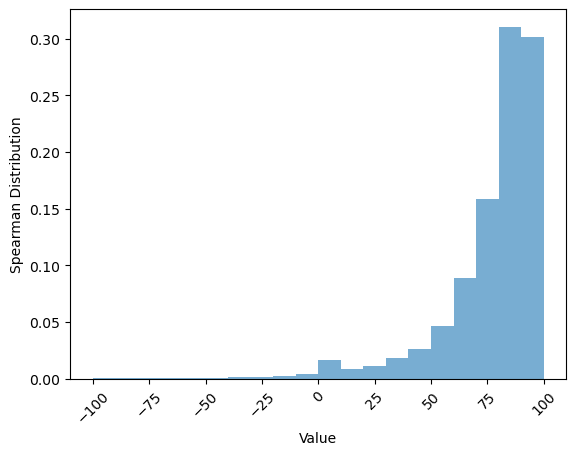

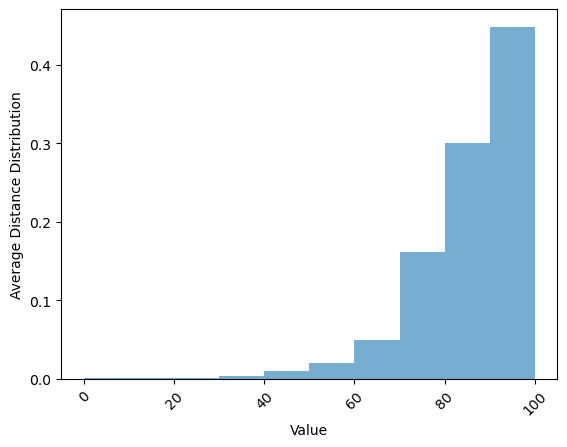

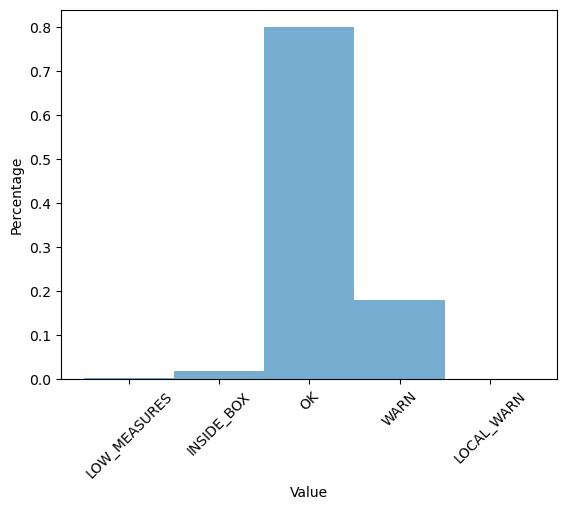

In [8]:
t.view_metrics(container_dict, box_window=7, mv_thresh = 50, min_days = 30, use = 'spear')

For publishing purpose

In [9]:
PATH = "home/unix/MySmartData"

container:Container
for id, container in container_dict.items():
    sl.save_container_structured(id, container, path=PATH, ver="_Corrected_with_metrics")

For sensors my advice is that you use a crude rate instead of a mean approximation because, despite sounding pleasing, you are loosing a lot of statistical information that should be dealt statistically and not is an ugly manner as we would use here. The error of the approximation could be much bigger than the error we get when considering the mean approximation for drivers

In [ ]:

PATH = "home/andre/SmartRatesMean"

OK_Containers = t.filter_containers(containers_dict=container_dict)

container:Container
for id , container in OK_Containers.items():
    sl.save_rate_series(id=id, container=container, rate_type='crude', freq='1D', path=PATH) 

ids = list(OK_Containers.keys())

sl.save_id_containers(ids, path=PATH, name = "Rate_Ids")